# Hackathon Ficohsa 2021 - Data Analytics

En este notebook detallaremos el procedimiento realizado en Python para poder segmentar a los clientes acorde a sus comportamientos de gastos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_clientes = pd.read_csv('CLIENTES_CSV')
df_transacciones = pd.read_csv('TRANSACCIONES_CSV', encoding = 'latin-1')
print('Dataframes creados éxitosamente')

Dataframes creados éxitosamente


## Exploración de dataset de Clientes

In [3]:
df_clientes.head()

,CODIGO_CLIENTE,SEGMENTO,EDAD,GENERO
0,10219832,CLASICO,65,MASCULINO
1,7853744,CLASICO,36,FEMENINO
2,7855108,CLASICO,42,FEMENINO
3,7860671,CLASICO,36,MASCULINO
4,7985606,CLASICO,61,FEMENINO


In [4]:
df_clientes.count()


CODIGO_CLIENTE    361835
SEGMENTO          361835
EDAD              361835
GENERO            361835
dtype: int64

In [5]:
df_clientes.isnull().sum()

CODIGO_CLIENTE    0
SEGMENTO          0
EDAD              0
GENERO            0
dtype: int64

In [6]:
df_clientes.set_index('CODIGO_CLIENTE', inplace = True)

In [7]:
df_clientes.describe()

,EDAD
count,361835.000000
mean,36.551464
std,12.722365
min,0.000000
25%,26.000000
50%,34.000000
75%,44.000000
max,141.000000


In [8]:
df_clientes['SEGMENTO'].unique()

array(['CLASICO', 'PLATINO', 'ORO', 'ESPECIAL'], dtype=object)

<AxesSubplot:xlabel='EDAD', ylabel='Density'>

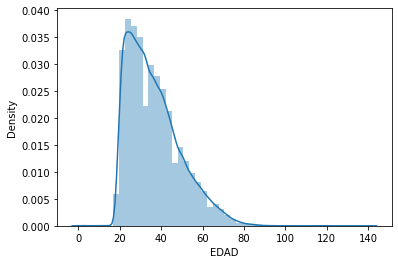

In [9]:
sns.distplot(df_clientes['EDAD'])

In [10]:
df_clientes['EDAD'].skew()

0.8999915573951883

In [11]:
df_clientes['EDAD'] = df_clientes['EDAD'].map(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:xlabel='EDAD', ylabel='Density'>

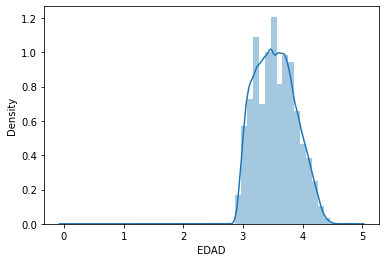

In [12]:
sns.distplot(df_clientes['EDAD'])

In [13]:
df_clientes['EDAD'].skew()

0.16542547282058642

In [14]:
df_clientes['SEGMENTO'] = df_clientes['SEGMENTO'].map({'CLASICO': 1, 'PLATINO':3,'ORO':2, 'ESPECIAL':4})
df_clientes['GENERO'] = df_clientes['GENERO'].map({'MASCULINO': 0, 'FEMENINO':1})


In [15]:
df_clientes.head()

,SEGMENTO,EDAD,GENERO
CODIGO_CLIENTE,,,
10219832,1,4.174387,0
7853744,1,3.583519,1
7855108,1,3.737670,1
7860671,1,3.583519,0
7985606,1,4.110874,1


<AxesSubplot:>

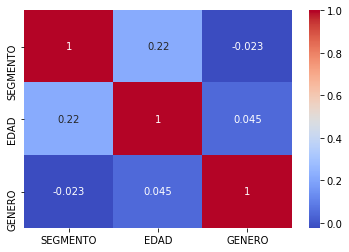

In [16]:
sns.heatmap(df_clientes.corr(), annot = True, cmap = 'coolwarm')

## Exploración de dataset de transacciones

In [17]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO
0,9158663,CLASICA,23-JUL-21,TC,GASOLINERAS,340 - Lempira,206.72
1,7985561,PLATINUM,11-SEP-21,TC,BODEGAS DE SUMINISTROS PARA EL HOGAR,840 - Dolar,46.80
2,8034303,SIGNATURE,30-JUL-21,TC,GRUPOS DE CARIDAD,340 - Lempira,21960.00
3,9119840,ORO,09-AUG-21,TC,SUPERMERCADOS,340 - Lempira,792.79
4,8822651,CLASICA,14-SEP-21,TC,GASOLINERAS,340 - Lempira,1480.20


In [18]:
df_transacciones.dtypes

CODIGO_CLIENTE         int64
DESCRIPCION_BIN       object
FECHA_TRANSACCION     object
TIPO_TARJETA          object
DESCRIPCION_MCC       object
MONEDA                object
MONTO                float64
dtype: object

In [19]:
df_transacciones.isnull().sum()

CODIGO_CLIENTE          0
DESCRIPCION_BIN      2142
FECHA_TRANSACCION       0
TIPO_TARJETA            0
DESCRIPCION_MCC         0
MONEDA                  0
MONTO                   1
dtype: int64

In [20]:
df_transacciones.count()

CODIGO_CLIENTE       2465898
DESCRIPCION_BIN      2463756
FECHA_TRANSACCION    2465898
TIPO_TARJETA         2465898
DESCRIPCION_MCC      2465898
MONEDA               2465898
MONTO                2465897
dtype: int64

In [21]:
moda_descripcion = df_transacciones['DESCRIPCION_BIN'].dropna().mode()[0]
moda_descripcion

'CLASICA'

In [22]:
df_transacciones['DESCRIPCION_BIN'].fillna(moda_descripcion, inplace = True)

In [23]:
df_transacciones.isnull().sum()

CODIGO_CLIENTE       0
DESCRIPCION_BIN      0
FECHA_TRANSACCION    0
TIPO_TARJETA         0
DESCRIPCION_MCC      0
MONEDA               0
MONTO                1
dtype: int64

In [24]:
df_transacciones.dropna(axis = 0, inplace = True)
df_transacciones.isnull().sum()

CODIGO_CLIENTE       0
DESCRIPCION_BIN      0
FECHA_TRANSACCION    0
TIPO_TARJETA         0
DESCRIPCION_MCC      0
MONEDA               0
MONTO                0
dtype: int64

In [25]:
df_transacciones.count()

CODIGO_CLIENTE       2465897
DESCRIPCION_BIN      2465897
FECHA_TRANSACCION    2465897
TIPO_TARJETA         2465897
DESCRIPCION_MCC      2465897
MONEDA               2465897
MONTO                2465897
dtype: int64

In [26]:
df_transacciones['DESCRIPCION_BIN'].unique()

array(['CLASICA', 'PLATINUM', 'SIGNATURE', 'ORO', 'ORO INTERNACIONAL',
       'INFINITE', 'VISA CLASICA INTERNACIONAL', 'CLASICA LOCAL',
       'VISA PLATINUM', 'CLASSIC INTERNACIONAL 2', 'GOLD 2',
       'STANDARD MC', 'VISA GOLD INTERNACIONAL', 'STANDARD', 'MC BLACK',
       'VISA CLASICA', 'GOLD MC', 'BUSINESS', 'CLASICA CON CHIP', 'PLAN',
       'FICOHSA REMESAS', 'CLASICO DISFRUTA MAS', 'ORO VISA DEBITO',
       'CLICK', 'TD FICOHSA PLATINUM', 'VISA INFINITE DEBITO',
       'TARJETA DEBITO UNITEC', 'TARJETA DEBITO PYME', 'CORPORATE',
       'MP CLASSIC', 'GLOBAL VISA DEBITO'], dtype=object)

En esta instancia, 1 representa Clásica, 2 representa Oro, 3 representa Platinum, 4 representa Otro tipo

In [27]:
df_transacciones['DESCRIPCION_BIN'] = df_transacciones['DESCRIPCION_BIN'].map({'CLASICA':1, 'PLATINUM': 3, 'SIGNATURE': 4, 'ORO':2, 
                                                            'ORO INTERNACIONAL': 2, 'INFINITE': 4, 'VISA CLASICA INTERNACIONAL': 1, 
                                                            'CLASICA LOCAL': 1, 'VISA PLATINUM': 3, 'CLASSIC INTERNACIONAL 2': 1,
                                                           'GOLD 2': 2, 'STANDARD MC': 1, 'VISA GOLD INTERNACIONAL': 2, 
                                                           'STANDARD': 1, 'MC BLACK': 3, 'VISA CLASICA': 1, 'GOLD MC': 2, 
                                                           'BUSINESS': 4, 'CLASICA CON CHIP': 1, 'PLAN': 4, 'FICOHSA REMESAS': 4,
                                                           'CLASICO DISFRUTA MAS': 1, 'ORO VISA DEBITO': 2, 'CLICK': 4,
                                                           'TD FICOHSA PLATINUM': 3, 'VISA INFINITE DEBITO': 4, 
                                                           'TARJETA DEBITO UNITEC': 4, 'TARJETA DEBITO PYME': 4, 'CORPORATE': 4,
                                                           'MP CLASSIC': 1, 'GLOBAL VISA DEBITO': 4})

In [28]:
df_transacciones['DESCRIPCION_BIN'].unique()

array([1, 3, 4, 2], dtype=int64)

In [29]:
df_transacciones['TIPO_TARJETA'].unique()

array(['TC', 'TD'], dtype=object)

In [30]:
df_transacciones['TIPO_TARJETA'] = df_transacciones['TIPO_TARJETA'].map({'TD':0,'TC':1})

In [31]:
 df_transacciones['TIPO_TARJETA'].unique()

array([1, 0], dtype=int64)

In [33]:
df_transacciones['MONEDA'].unique()

array(['340 - Lempira', '840 - Dolar'], dtype=object)

In [34]:
df_transacciones['MONEDA'] = df_transacciones['MONEDA'].map({'340 - Lempira': 340, '840 - Dolar': 840})

In [35]:
df_transacciones['MONEDA'].unique()

array([340, 840], dtype=int64)

In [37]:
df_transacciones['CODIGO_CLIENTE'].nunique()

202510

In [38]:
df_transacciones.dtypes

CODIGO_CLIENTE         int64
DESCRIPCION_BIN        int64
FECHA_TRANSACCION     object
TIPO_TARJETA           int64
DESCRIPCION_MCC       object
MONEDA                 int64
MONTO                float64
dtype: object

In [43]:
df_transacciones['FECHA_TRANSACCION'] = pd.to_datetime(df_transacciones['FECHA_TRANSACCION'], infer_datetime_format=True)

In [44]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO
0,9158663,1,2021-07-23,1,GASOLINERAS,340,206.72
1,7985561,3,2021-09-11,1,BODEGAS DE SUMINISTROS PARA EL HOGAR,840,46.80
2,8034303,4,2021-07-30,1,GRUPOS DE CARIDAD,340,21960.00
3,9119840,2,2021-08-09,1,SUPERMERCADOS,340,792.79
4,8822651,1,2021-09-14,1,GASOLINERAS,340,1480.20


In [45]:
df_transacciones.dtypes

CODIGO_CLIENTE                int64
DESCRIPCION_BIN               int64
FECHA_TRANSACCION    datetime64[ns]
TIPO_TARJETA                  int64
DESCRIPCION_MCC              object
MONEDA                        int64
MONTO                       float64
dtype: object

In [46]:
df_transacciones['DIA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.day
df_transacciones['SEMANA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.week
df_transacciones['MES_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.month
df_transacciones['AÑO_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.year
df_transacciones['DIADESEMANA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.dayofweek


En este caso, Dia de semana representa 0 el domingo, 1 el lunes, 2 el martes y asi consecutivamente. 

In [47]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO,DIA_TRANSACCION,SEMANA_TRANSACCION,MES_TRANSACCION,AÑO_TRANSACCION,DIADESEMANA_TRANSACCION
0,9158663,1,2021-07-23,1,GASOLINERAS,340,206.72,23,29,7,2021,4
1,7985561,3,2021-09-11,1,BODEGAS DE SUMINISTROS PARA EL HOGAR,840,46.80,11,36,9,2021,5
2,8034303,4,2021-07-30,1,GRUPOS DE CARIDAD,340,21960.00,30,30,7,2021,4
3,9119840,2,2021-08-09,1,SUPERMERCADOS,340,792.79,9,32,8,2021,0
4,8822651,1,2021-09-14,1,GASOLINERAS,340,1480.20,14,37,9,2021,1


In [48]:
df_transacciones.dtypes

CODIGO_CLIENTE                      int64
DESCRIPCION_BIN                     int64
FECHA_TRANSACCION          datetime64[ns]
TIPO_TARJETA                        int64
DESCRIPCION_MCC                    object
MONEDA                              int64
MONTO                             float64
DIA_TRANSACCION                     int64
SEMANA_TRANSACCION                  int64
MES_TRANSACCION                     int64
AÑO_TRANSACCION                     int64
DIADESEMANA_TRANSACCION             int64
dtype: object

In [52]:
df_transacciones.drop('FECHA_TRANSACCION', axis = 1, inplace = True)

In [53]:
df_transacciones.dtypes

CODIGO_CLIENTE               int64
DESCRIPCION_BIN              int64
TIPO_TARJETA                 int64
DESCRIPCION_MCC             object
MONEDA                       int64
MONTO                      float64
DIA_TRANSACCION              int64
SEMANA_TRANSACCION           int64
MES_TRANSACCION              int64
AÑO_TRANSACCION              int64
DIADESEMANA_TRANSACCION      int64
dtype: object